In [1]:
library(arules)   # For conducting association rule mining
library(arulesViz) # For visualizing association rules

Warning message:
"package 'arules' was built under R version 3.6.3"Loading required package: Matrix

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Warning message:
"package 'arulesViz' was built under R version 3.6.3"Loading required package: grid


In [2]:
trans_df <-read.csv(file.choose(), stringsAsFactors = TRUE) 
trans_df$order_id = factor(trans_df$order_id)
str(trans_df)

'data.frame':	150018 obs. of  2 variables:
 $ order_id    : Factor w/ 78124 levels "36","98","112",..: 27310 27310 34222 34222 34222 50281 12065 20367 25180 25180 ...
 $ product_name: Factor w/ 5101 levels "Strawberry Squeeze Fruit Spread",..: 4774 4990 2860 2727 3386 918 3060 3575 4084 1798 ...


In [42]:
trans_list <- split(trans_df$product_name, trans_df$order_id) # split into groups 
head(trans_list)

$`36`
[1] Super Greens Salad
5101 Levels: Strawberry Squeeze Fruit Spread ... ZzzQuil Nighttime Sleep-Aid LiquiCaps

$`98`
[1] Whole Milk Greek Blended Vanilla Bean Yogurt
[2] Tomatoes, Crushed, Organic                  
[3] Uncured Applewood Smoked Bacon              
[4] Unsalted Cultured Butter                    
[5] Uncured Genoa Salami                        
5101 Levels: Strawberry Squeeze Fruit Spread ... ZzzQuil Nighttime Sleep-Aid LiquiCaps

$`112`
[1] Umcka Elderberry Intensive Cold + Flu Berry Flavor
5101 Levels: Strawberry Squeeze Fruit Spread ... ZzzQuil Nighttime Sleep-Aid LiquiCaps

$`170`
[1] XL Emerald White Seedless Grapes    Xpolsive Pizza Baked Snack Crackers
[3] Vanilla Unsweetened Almond Milk    
5101 Levels: Strawberry Squeeze Fruit Spread ... ZzzQuil Nighttime Sleep-Aid LiquiCaps

$`226`
[1] Vitamin D Whole Milk            Take & Toss 10oz Cups w/ Straws
[3] Wrap Aluminum Foil Heavy Duty  
5101 Levels: Strawberry Squeeze Fruit Spread ... ZzzQuil Nighttime Sleep-Aid LiquiCaps

$`349`
[1] Uncured Hickory Smoked Sunday Bacon
5101 Levels: Strawberry Squeeze Fruit Spread ... ZzzQuil Nighttime Sleep-Aid LiquiCaps

In [4]:
df_trx <- as(trans_list, 'transactions')  # transform to transational class

In [5]:
inspect(tail(df_trx)) # The last 6 transactions in the dataset

    items                                                   transactionID
[1] {Total 2% Lowfat Greek Strained Yogurt With Blueberry,               
     Total 2% with Strawberry Lowfat Greek Strained Yogurt}       3420909
[2] {Sustainably Soft Bath Tissue}                                3420996
[3] {Uncured Genoa Salami}                                        3420998
[4] {Tartar Sauce,                                                       
     Total Plain Greek Strained Yogurt}                           3421056
[5] {Sweet Potatoes,                                                     
     White Giant Paper Towel Rolls,                                      
     Wine Infused Salame Cheese and Crackers Small Plates}        3421058
[6] {Twice Baked Potatoes}                                        3421063


## 4.2 Market Basket Exploratory Analysis

In [6]:
summary(df_trx)

transactions as itemMatrix in sparse format with
 78124 rows (elements/itemsets/transactions) and
 5101 columns (items) and a density of 0.0003764468 

most frequent items:
                                 Yellow Onions 
                                          3762 
                        Unsweetened Almondmilk 
                                          2169 
                          Uncured Genoa Salami 
                                          1788 
Unsweetened Original Almond Breeze Almond Milk 
                                          1465 
                               Unsalted Butter 
                                          1435 
                                       (Other) 
                                        139399 

element (itemset/transaction) length distribution:
sizes
    1     2     3     4     5     6     7     8     9    10    11    12    13 
39242 20746  9958  4483  2036   925   392   191    87    36    13     9     3 
   14    15 
    2     1 

   Min. 

Gives a detailed overview of the transactional class

### 4.2.1 Most popular items (specific to this dataset)

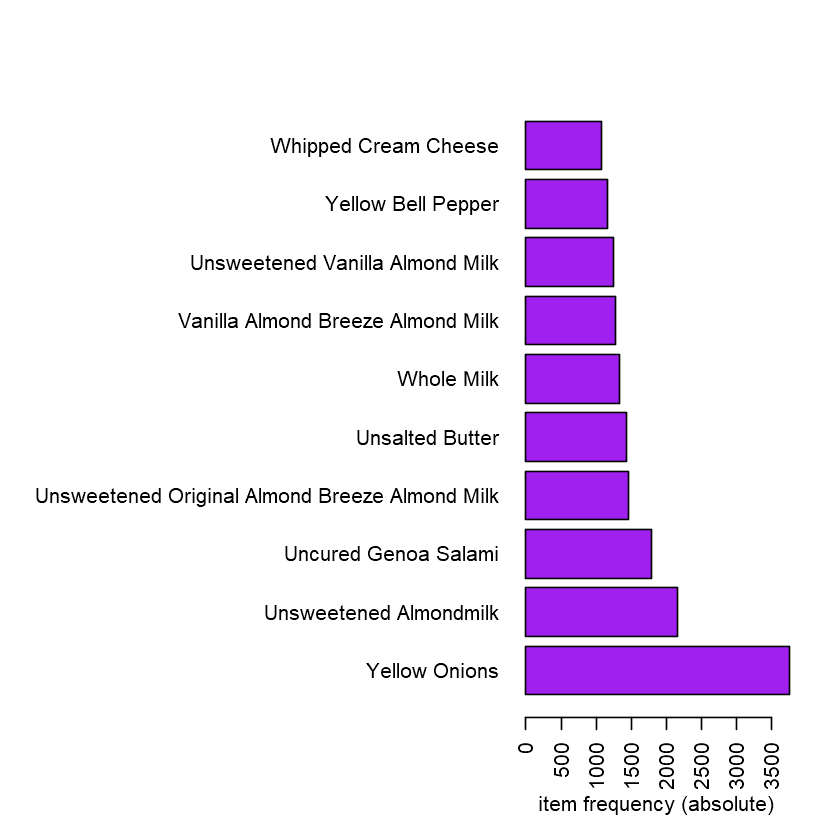

In [7]:
itemFrequencyPlot(df_trx, type = 'absolute', topN = 10, horiz = TRUE, col = 'purple') #Top 10

### 4.2.2 Cross Tables

In [8]:
cross_tbl <- crossTable(df_trx, sort = TRUE)
cross_tbl[1:10,1:10] # viewing top 10 items in the cross table

Yellow Onions
Yellow Onions                                  3762         
Unsweetened Almondmilk                           73         
Uncured Genoa Salami                             54         
Unsweetened Original Almond Breeze Almond Milk   55         
Unsalted Butter                                 110         
Whole Milk                                       68         
Vanilla Almond Breeze Almond Milk                50         
Unsweetened Vanilla Almond Milk                  39         
Yellow Bell Pepper                              145         
Whipped Cream Cheese                             48         
                                               Unsweetened Almondmilk
Yellow Onions                                    73                  
Unsweetened Almondmilk                         2169                  
Uncured Genoa Salami                             57                  
Unsweetened Original Almond Breeze Almond Milk    8                  
Unsalted Butter                                  22                  
Whole Milk                                       12                  
Vanilla Almond Breeze Almond Milk                 4                  
Unsweetened Vanilla Almond Milk                  53                  
Yellow Bell Pepper                               29                  
Whipped Cream Cheese                             29                  
                                               Uncured Genoa Salami
Yellow Onions                                    54                
Unsweetened Almondmilk                           57                
Uncured Genoa Salami                           1788                
Unsweetened Original Almond Breeze Almond Milk   26                
Unsalted Butter                                  38                
Whole Milk                                       15                
Vanilla Almond Breeze Almond Milk                 9                
Unsweetened Vanilla Almond Milk                  30                
Yellow Bell Pepper                               18                
Whipped Cream Cheese                             55                
                                               Unsweetened Original Almond Breeze Almond Milk
Yellow Onions                                    55                                          
Unsweetened Almondmilk                            8                                          
Uncured Genoa Salami                             26                                          
Unsweetened Original Almond Breeze Almond Milk 1465                                          
Unsalted Butter                                  21                                          
Whole Milk                                       13                                          
Vanilla Almond Breeze Almond Milk                30                                          
Unsweetened Vanilla Almond Milk                   6                                          
Yellow Bell Pepper                               31                                          
Whipped Cream Cheese                             13                                          
                                               Unsalted Butter Whole Milk
Yellow Onions                                   110              68      
Unsweetened Almondmilk                           22              12      
Uncured Genoa Salami                             38              15      
Unsweetened Original Almond Breeze Almond Milk   21              13      
Unsalted Butter                                1435              38      
Whole Milk                                       38            1335      
Vanilla Almond Breeze Almond Milk                21              16      
Unsweetened Vanilla Almond Milk                  13               8      
Yellow Bell Pepper                               34              10      
Whipped Cream Cheese                             42               7      
          

This means that for example, there are 73 transactions that contain Yellow Onions and Unsweetened Almondmilk. 

### 4.2.3 Extracting frequent itemsets 
Just as the title suggests, this section is all about discovering the most popular itemsets frequently bought together.

In [9]:
freq_2 <- apriori(df_trx,
                 parameter = list(supp = 0.0001, # Specify minimum support threshold
                                 minlen = 2, # Specify minimum number of items in transaction
                                 target = 'frequent'))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5   1e-04      2
 maxlen            target  ext
     10 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5101 item(s), 78124 transaction(s)] done [0.10s].
sorting and recoding items ... [2028 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 done [0.04s].
sorting transactions ... done [0.02s].
writing ... [1365 set(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [10]:
inspect(head(sort(freq_2, by = 'support'),10)) ## Sort and inspect frequent itemsets

     items                                                       support transIdenticalToItemsets count
[1]  {Total 2% Lowfat Greek Strained Yogurt With Blueberry,                                            
      Total 2% with Strawberry Lowfat Greek Strained Yogurt} 0.002995238             3.072039e-04   234
[2]  {Total 2% Lowfat Greek Strained Yogurt with Peach,                                                
      Total 2% with Strawberry Lowfat Greek Strained Yogurt} 0.002905637             3.840049e-04   227
[3]  {Total 2% Lowfat Greek Strained Yogurt With Blueberry,                                            
      Total 2% Lowfat Greek Strained Yogurt with Peach}      0.002291229             6.400082e-05   179
[4]  {Total 2% All Natural Greek Strained Yogurt with Honey,                                           
      Total 2% with Strawberry Lowfat Greek Strained Yogurt} 0.002240029             2.560033e-04   175
[5]  {Total 2% Greek Strained Yogurt with Cherry 5.3 oz,        

The most frequent itemsets using a support of 0.0001 and minlen of 2 (i.e minimum number of products in a set).

### 4.2.4 Extracting rules

A rule simply implies that if a customer buys one or more items, he or she is likely to buy a different item. I will be extracting all possible rules using a minimum support of 0.0001 and confidence of 0.5.

### Metrics in Association rule mining
1. Support is a measure of how frequent an itemset occur together as a percentage of all transactions.Also known as popularity of the itemset. 

2. Confidence{A -> B} measures how likely item B will be purchased given that item A has been purchased already.

3. Lift{A -> B}  measures how likely item B will be purchased given that item A has been purchased already, while controlling for how popular item B is. It essentially defines how strong the association of both items is. A lift of 1 implies no association between both items. A value greater than 1 implies that item B is very likely to be bought if item A is bought. A value less than one implies that item B is unlikely to be bought if item A is bought. 

In [11]:
rules_0.5 <- apriori(df_trx,
                 parameter = list(supp = 0.0001, # Specify minimum support threshold
                                  conf = 0.5, # Specify confidence
                                 minlen = 2, # Specify minimum number of items in transaction
                                 target = 'rules'))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5   1e-04      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5101 item(s), 78124 transaction(s)] done [0.10s].
sorting and recoding items ... [2028 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 done [0.03s].
writing ... [192 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


There were 192 rules created with a minimum confidence of 0.5

In [12]:
inspect(head(sort(rules_0.5, by="lift")))  ## listing the rules with highest lift

    lhs                                                    rhs                                                      support confidence     coverage     lift count
[1] {Unsweet Blackberry Sparkling Water}                => {Unsweet Peach Sparkling Water}                     0.0001152015  0.5294118 0.0002176028 2432.927     9
[2] {Unsweet Peach Sparkling Water}                     => {Unsweet Blackberry Sparkling Water}                0.0001152015  0.5294118 0.0002176028 2432.927     9
[3] {Triple Zero Banana Creme Oikos Greek Yogurt}       => {Triple Zero Strawberry Oikos Greek Yogurt}         0.0001024013  0.5000000 0.0002048026 2170.111     8
[4] {Unsweetened Blackberry Water,                                                                                                                                
     Water, Unsweet, Blood Orange}                      => {Unsweetened Pomegranate Essence Water}             0.0001152015  0.6428571 0.0001792023 1357.367     9
[5] {Whips! Orange Cre

Explaining the first record; If a customer buys Unsweet Blackberry Sparkling Water, he or she is likely to buy Unsweet Peach Sparkling Water with a likelihood of about 0.529(confidence). This pair has occured 9 times(count) in the entire dataset. A lift greater than 1 means that there is a strong association between this pair and possess a high possibility of being bought together in the future.

### 4.2.5 Visualizing Rules Number vs Confidence levels
Taking a look at the various number of rules gotten for each increment of confidence values. Using a support of 0.0001

In [13]:
conf_levels <- seq(from = 0.1, to = 1, by =0.1) #setting confidence levels
rules_sup_1 <- NULL                   # empty vector

In [14]:
for (i in 1:length(conf_levels)) {
        rules_sup_1[i] = length(apriori(df_trx, parameter=list(supp = 0.0001,
                                                                  conf = conf_levels[i],target = "rules")))}

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   1e-04      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5101 item(s), 78124 transaction(s)] done [0.11s].
sorting and recoding items ... [2028 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 done [0.03s].
writing ... [700 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].
Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   1e-04      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort ve

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

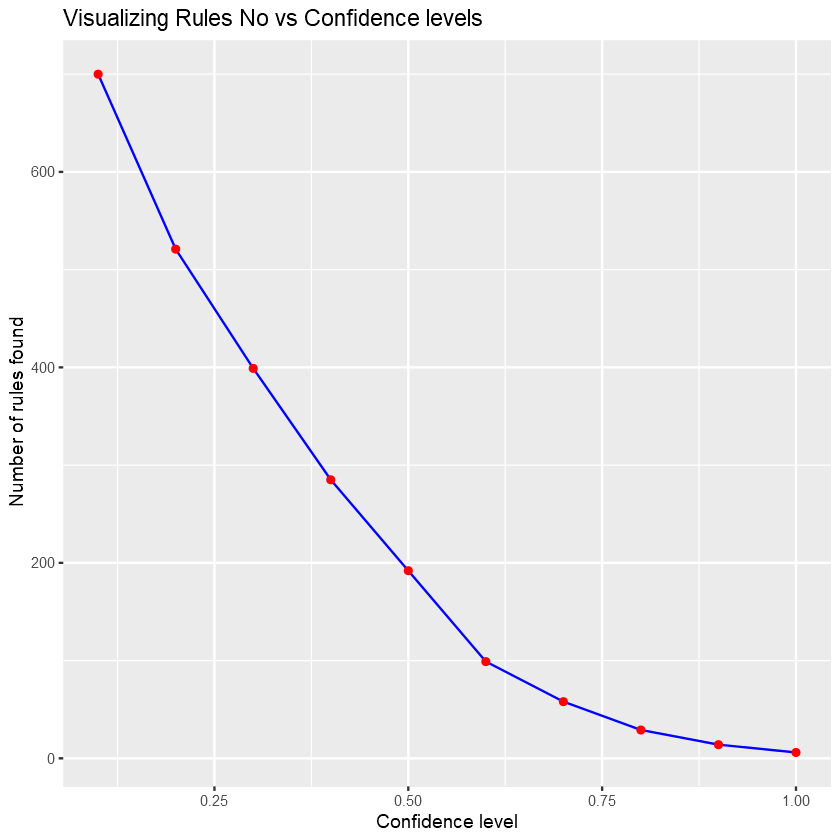

In [15]:
## Create plot
library(ggplot2)
ggplot() + geom_line(aes(x = conf_levels, y = rules_sup_1), color = 'blue') + 
    geom_point(aes(x = conf_levels, y = rules_sup_1), color = 'red') + 
    xlab("Confidence level") + ylab("Number of rules found") + ggtitle('Visualizing Rules No vs Confidence levels')

The number of rules decreases with increasing confidence value

### 4.2.6 Interactive Inspection Table
An interactive table will be created. In the table, users can specify LHS, RHS, support, confidence, lift and count. Firstly, rules will be created considering very low support and confidence.

In [16]:
rules_all <- apriori(df_trx,
                 parameter = list(supp = 0.0001, 
                                  conf = 0.2,
                                 minlen = 2,
                                 target = 'rules'))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   1e-04      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5101 item(s), 78124 transaction(s)] done [0.11s].
sorting and recoding items ... [2028 item(s)] done [0.00s].
creating transaction tree ... done [0.04s].
checking subsets of size 1 2 3 4 5 done [0.03s].
writing ... [521 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


In [17]:
inspectDT(rules_all) ## Interative table to specify various parameters

HTML widgets cannot be represented in plain text (need html)

### 4.2.7 Interactive Plots for Rules
This graph gives a visual representation of the interconnectivity of the rules and products.Due to limitation in computing resources, I will limit the graph to the top 20 rules by confidence. 

In [31]:
 rules_20 <- head(sort(rules_all, by = 'confidence'), 20)

In [32]:
plot(rules_20, method = 'graph', engine = 'html')

HTML widgets cannot be represented in plain text (need html)

An arrow pointing out of a product means the product is on the LHS, while that pointing to a product means it is on the RHS. The colour shade of each rule is dependent on the lift of that rule. Pointing at each rule provides more information about the rule.

### 4.2.7 More insights
I needed more insights about the most popular products. I wanted to know what products influenced the purchase of the most popular product (Yellow Onions). For this reason, i will use this product as a consequent (RHS).

Note: you can achieve this with the interactive table above.

In [33]:
rules_top <- apriori(df_trx,
                 parameter = list(supp = 0.0001, 
                                  conf = 0.2,
                                 minlen = 2,
                                 target = 'rules'),
                      appearance = list(default = 'lhs',
                                       rhs = 'Yellow Onions'))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   1e-04      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[5101 item(s), 78124 transaction(s)] done [0.11s].
sorting and recoding items ... [2028 item(s)] done [0.00s].
creating transaction tree ... done [0.05s].
checking subsets of size 1 2 3 4 5 done [0.03s].
writing ... [2 rule(s)] done [0.02s].
creating S4 object  ... done [0.01s].


In [34]:
inspect(rules_top_3)

    lhs                        rhs             support      confidence
[1] {Sweet Grape Tomatoes}  => {Yellow Onions} 0.0002048026 0.2253521 
[2] {Whole Peeled Tomatoes} => {Yellow Onions} 0.0003328043 0.2203390 
    coverage     lift     count
[1] 0.0009088116 4.679800 16   
[2] 0.0015104193 4.575695 26   


A confidence of 0.2 was used to achieve this.

### 4.2.8 Getting rid of Redundant rules
A rule is redundant if a more general rule with same or a higher confidence exists. A rule is more general if it has the same RHS but one or more items removed from the LHS. I will be removing redundant rules from the rules_all earlier created.

In [40]:
length(rules_all)

[1] 521

rules_all has 521 rules created. Let me try prunning to find out if any redundant rule exist

In [41]:
non_redundant_rules <- rules_all[!is.redundant(rules_all)]
length(non_redundant_rules)

[1] 509

12 redundant rules were removed.

# 5. Conclusion and Applications
The findings from this project can be applied in the following cases:
1. Retailers can bundle worst performing products in sales with other products that they have strong assoiation with and apply a bundle discount. This is not restricted to only brick and mortar stores, e-commerce owners can also apply this technique under the frequently bought together option on their e-commerce sites.
2. Aisles can be arranged in such a way such that shelves of products with strong associations can be put side by side.
